[https://github.com/ben519/MLPB/tree/master/Problems/Classify%20Dart%20Throwers](https://github.com/ben519/MLPB/tree/master/Problems/Classify%20Dart%20Throwers)

[http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/)

In [1]:
!ls _Data/

data_generation.R  README.md  test.csv	train.csv


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
train_df = pd.read_csv('_Data/train.csv')
test_df = pd.read_csv('_Data/test.csv')

In [4]:
train_df.head()

,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate


In [5]:
test_df.head()

,ID,XCoord,YCoord,Competitor
0,6,0.064729,0.356983,Mark
1,12,-0.766731,-0.255876,Sue
2,22,0.182282,-0.540976,Mark
3,34,-0.908910,0.223945,Bob
4,47,0.992230,-0.085550,Bob


In [6]:
train_df.dtypes

ID              int64
XCoord        float64
YCoord        float64
Competitor     object
dtype: object

In [7]:
map_dict = {'Bob': 0, 'Kate':1, 'Sue':2, 'Mark':3}
train_df['target'] = train_df.Competitor.map(map_dict)
test_df['target'] = test_df.Competitor.map(map_dict)

In [8]:
train_df.head()

,ID,XCoord,YCoord,Competitor,target
0,111,0.943354,-0.184819,Bob,0
1,92,0.121557,-0.927656,Bob,0
2,20,0.818485,0.375437,Bob,0
3,75,0.867462,-0.159851,Sue,2
4,10,-0.817321,-0.373419,Kate,1


In [9]:
train_df.target.unique()

array([0, 2, 1, 3])

In [10]:
test_df.target.unique()

array([3, 2, 0, 1])

In [11]:
X_train = train_df[['XCoord', 'YCoord']].values
X_train.shape

(150, 2)

In [12]:
y_train = train_df.target.values
y_train.shape

(150,)

In [13]:
X_test = test_df[['XCoord', 'YCoord']].values
X_test.shape

(37, 2)

In [14]:
y_test = test_df.target.values
y_test.shape

(37,)

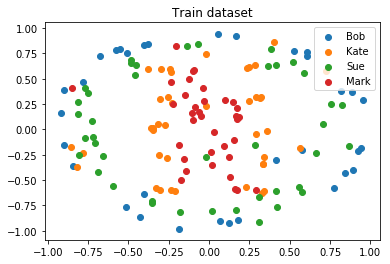

In [15]:
fig, axs = plt.subplots()
axs.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Bob')
axs.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Kate')
axs.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], label='Sue')
axs.scatter(X_train[y_train == 3][:, 0], X_train[y_train == 3][:, 1], label='Mark')
axs.legend()
axs.set_title('Train dataset')
fig.show()

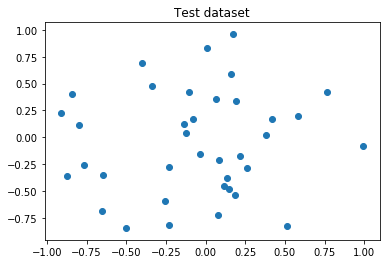

In [16]:
fig, axs = plt.subplots()
axs.scatter(X_test[:, 0], X_test[:, 1])
axs.set_title('Test dataset')
fig.show()

## K-Nearest Neighbors (Base Model1)

In [18]:
knn_grid = {'n_neighbors': list(range(1, 11))}
knn_cls = KNeighborsClassifier()
grid_search = GridSearchCV(knn_cls, knn_grid, cv=5, scoring='accuracy')

In [19]:
grid_search.fit(X_train, y_train)

/home/software/miniconda3/envs/tnn/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
grid_search.best_params_

{'n_neighbors': 1}

In [21]:
grid_search.cv_results_['mean_test_score']

array([0.65333333, 0.56      , 0.58666667, 0.50666667, 0.49333333,
       0.53333333, 0.50666667, 0.46666667, 0.48666667, 0.46666667])

In [22]:
grid_search.best_score_

0.6533333333333333

In [23]:
knn_cls = KNeighborsClassifier(n_neighbors=1)
knn_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
y_pred = knn_cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.7027027027027027

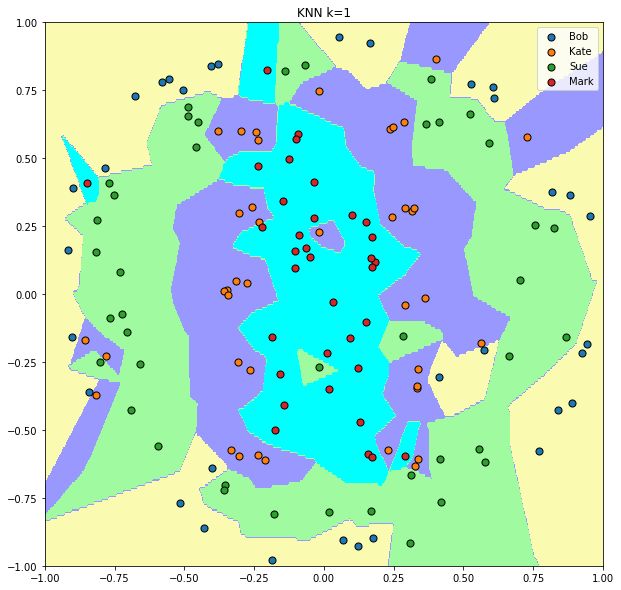

In [85]:
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(figsize=(10, 10))
x0, x1 = np.meshgrid(
        np.linspace(-1, 1, 500).reshape(-1, 1),
        np.linspace(-1, 1, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = knn_cls.predict(X_new)
zz = y_pred.reshape(x0.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0', 'cyan'])
axs.contourf(x0, x1, zz, cmap=custom_cmap)

axs.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Bob', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Kate', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], label='Sue', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 3][:, 0], X_train[y_train == 3][:, 1], label='Mark', edgecolors='k', s=50)
axs.legend()
axs.set_title('KNN k=1')
fig.show()

## Support Vector Machine (Base Model2)

In [71]:
svc_grid = {'degree': [1, 3, 5, 7], 'coef0': [0, 10, 30, 80], 'C': [0.1, 1, 2, 5]}
svc_cls = SVC(kernel="poly") 
grid_search = GridSearchCV(svc_cls, svc_grid, cv=5, scoring='accuracy', n_jobs=4)

In [72]:
grid_search.fit(X_train, y_train)

/home/software/miniconda3/envs/tnn/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'degree': [1, 3, 5, 7], 'coef0': [0, 10, 30, 80], 'C': [0.1, 1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
grid_search.best_params_

{'C': 2, 'coef0': 80, 'degree': 3}

In [74]:
grid_search.best_score_

0.8266666666666667

In [75]:
grid_search.cv_results_['mean_test_score']

array([0.24666667, 0.21333333, 0.22      , 0.26      , 0.24666667,
       0.46      , 0.78666667, 0.70666667, 0.24666667, 0.5       ,
       0.72666667, 0.68      , 0.24666667, 0.63333333, 0.66      ,
       0.66      , 0.25333333, 0.21333333, 0.22      , 0.26      ,
       0.25333333, 0.64666667, 0.74666667, 0.69333333, 0.25333333,
       0.75333333, 0.67333333, 0.68      , 0.25333333, 0.8       ,
       0.66666667, 0.66      , 0.26      , 0.21333333, 0.22      ,
       0.26      , 0.26      , 0.72      , 0.72666667, 0.68666667,
       0.26      , 0.80666667, 0.68      , 0.68      , 0.26      ,
       0.82666667, 0.66666667, 0.68      , 0.25333333, 0.21333333,
       0.22      , 0.26      , 0.25333333, 0.75333333, 0.69333333,
       0.64666667, 0.25333333, 0.81333333, 0.61333333, 0.68      ,
       0.25333333, 0.82      , 0.66666667, 0.66666667])

In [76]:
svc_cls = grid_search.best_estimator_
y_pred = svc_cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.8648648648648649

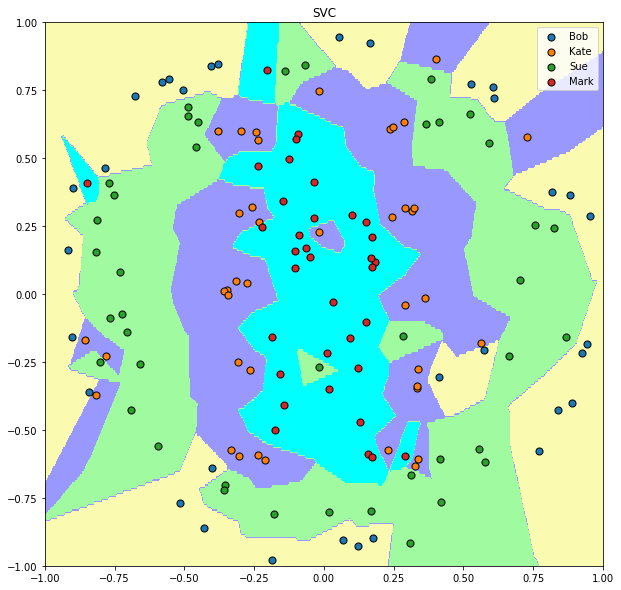

In [86]:
from matplotlib.colors import ListedColormap
fig, axs = plt.subplots(figsize=(10, 10))
x0, x1 = np.meshgrid(
        np.linspace(-1, 1, 500).reshape(-1, 1),
        np.linspace(-1, 1, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = knn_cls.predict(X_new)
zz = y_pred.reshape(x0.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0', 'cyan'])
axs.contourf(x0, x1, zz, cmap=custom_cmap)

axs.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Bob', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Kate', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], label='Sue', edgecolors='k', s=50)
axs.scatter(X_train[y_train == 3][:, 0], X_train[y_train == 3][:, 1], label='Mark', edgecolors='k', s=50)
axs.legend()
axs.set_title('SVC')
fig.show()

## Stacking (Meta Ensembling)

In [17]:
train_meta = []
trainy_meta = []
# 
kfolds = KFold(n_splits=5, random_state=42, shuffle=False)

In [18]:
knn_cls = KNeighborsClassifier(n_neighbors=1)
svc_cls = SVC(kernel='poly', C=2, coef0=80, degree=3, probability=True)

In [19]:
for train_index, test_index in kfolds.split(X_train, y_train):
    xtrn = X_train[train_index]
    ytrn = y_train[train_index]
    xtst = X_train[test_index]
    ytst = y_train[test_index]
    knn_cls.fit(xtrn, ytrn)
    svc_cls.fit(xtrn, ytrn)
    yprob_knn = knn_cls.predict_proba(xtst)
    yprob_svc = svc_cls.predict_proba(xtst)
    train_meta.append(np.c_[yprob_knn, yprob_svc])
    trainy_meta.append(ytst)
train_meta = np.concatenate(train_meta, axis=0)
trainy_meta = np.concatenate(trainy_meta, axis=0)

In [20]:
train_meta.shape, trainy_meta.shape

((150, 8), (150,))

In [21]:
knn_cls.fit(X_train, y_train)
svc_cls.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=80,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
accuracy_score(y_test, knn_cls.predict(X_test))

0.7027027027027027

In [23]:
accuracy_score(y_test, svc_cls.predict(X_test))

0.8648648648648649

In [24]:
test_meta_knn = knn_cls.predict_proba(X_test)
test_meta_svc = svc_cls.predict_proba(X_test)
test_meta = np.c_[test_meta_knn, test_meta_svc]
test_meta.shape

(37, 8)

In [65]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 2, 20)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [66]:
log_cls = LogisticRegression()

In [67]:
# Create grid search using 5-fold cross validation
grid_search = GridSearchCV(log_cls, hyperparameters, cv=kfolds)

In [68]:
grid_search.fit(train_meta, trainy_meta)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([  1.     ,   1.27427,   1.62378,   2.06914,   2.63665,   3.35982,
         4.28133,   5.45559,   6.95193,   8.85867,  11.28838,  14.3845 ,
        18.32981,  23.35721,  29.76351,  37.9269 ,  48.3293 ,  61.58482,
        78.476  , 100.     ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
grid_search.best_params_

{'C': 8.858667904100825, 'penalty': 'l1'}

In [70]:
grid_search.best_score_

0.7333333333333333

In [71]:
log_cls = grid_search.best_estimator_

In [72]:
accuracy_score(y_test, log_cls.predict(test_meta))

0.8378378378378378

### stacking model(0.84) is outperformed by base model svc(0.86), stacking does not help this